In [1]:
import pandas as pd

In [16]:
import os

PATH = "../data/NEWS/KBS/KBS_before2022/"

df = pd.DataFrame()
for file in os.listdir(PATH):
    if file[-3:] == 'pkl':
        print(file)
        temp = pd.read_pickle(f"{PATH}/{file}")
        print(temp.shape)
        df = pd.concat([df, temp], axis = 0)
    else:
        print(f"{file} PASS")


KBS_2020-03-01_2018-10-18.pkl
(119885, 18)
KBS_2014-08-29_2012-06-03.pkl
(46332, 18)
KBS_2020-12-31_2020-03-01.pkl
(233544, 18)
KBS_2018-10-18_2016-08-09.pkl
(111115, 18)
KBS_2021-11-05_2022-01-01.pkl
(49499, 18)
KBS_2016-08-09_2014-08-29.pkl
(110162, 18)
KBS_2021-01-01_2021-11-03.pkl
(366046, 18)


In [17]:
PATH = "../data/NEWS/KBS/"

df = pd.DataFrame()
for file in os.listdir(PATH):
    if file[-3:] == 'pkl':
        print(file)
        temp = pd.read_pickle(f"{PATH}/{file}")
        print(temp.shape)
        df = pd.concat([df, temp], axis = 0)
    else:
        print(f"{file} PASS")

KBS_0101_0831.pkl
(889822, 21)
KBS_130905_211231.pkl
(1036583, 20)
KBS2201_2208 PASS
KBS_before2022 PASS


In [18]:
df.reset_index(drop = True, inplace= True)

In [19]:
df['year'] = df['time'].apply(lambda x : x[:4])

In [20]:
df.reset_index(drop = True, inplace= True)

In [21]:
df['ymd'] = df['time'].apply(lambda x : x[:10])

In [22]:
df.groupby('ymd').size()

ymd
2013-09-05     1031
2013-09-06      580
2013-09-07       15
2013-09-08        6
2013-09-09      271
              ...  
2022-08-27     8560
2022-08-28     9738
2022-08-29    22962
2022-08-30    14748
2022-08-31    12606
Length: 3160, dtype: int64

In [23]:
df = df.sort_values('ymd')
df.reset_index(drop = True, inplace = True)

In [24]:
df.shape

(1926405, 21)

In [25]:
df.to_pickle('../data/NEWS/KBS/KBS_130905_220831.pkl')

Text(0.5, 1.0, 'KBS ~ 2022-0831 comments')

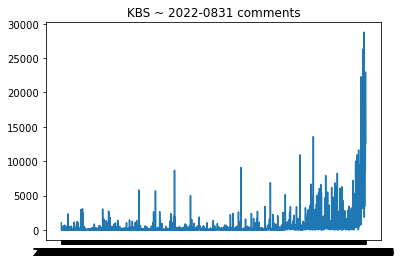

In [26]:
import matplotlib.pyplot as plt

plt.plot(df.groupby('ymd').size())
plt.title("KBS ~ 2022-0831 comments")

Text(0.5, 1.0, 'KBS 2016-0809~2021-1231 video')

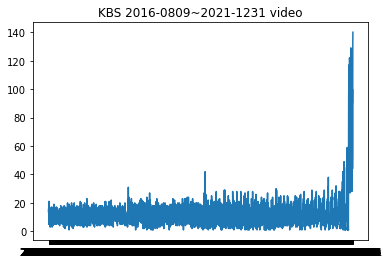

In [27]:
plt.plot(df.drop_duplicates('video_title').groupby('ymd').size())
plt.title("KBS ~ 2022-0831 video")

In [32]:
lst = []
TARGET = '카카오'


for idx, i in enumerate(df['video_title']):
    if TARGET in i:
        lst.append(idx)

for idx, i in enumerate(df['comment']):
    if TARGET in str(i):
        lst.append(idx)

list(set(lst))

df.loc[lst,'comment']

13007                                        마이피플은일하는사람들이쓰는데
13025                                               전 라인좋아해요
40727                                                    NaN
41740                              다음 마이피플과 요즘 잘 썼는데, 너무 아쉬움
41747                                          카카오는  텐센트 실험쥐
                                 ...                        
1884221    규제만이 정답은 아니지 옛날에도 카카오톡을 이렇게 휘둘렀다가 사이버 망명이 생겨서 ...
1887455    내가 카카오 블루 기사거든 오늘 어떤놈이 지프<br>라이타를 떨궜다고 해서 보니 있...
1898346    보이스 피싱을 막으려면 해킹 기술을 먼저 이해를 해야 합니다.\r<br>참고로 KB...
1898347    나이스<br>보이스 피싱을 막으려면 해킹 기술을 먼저 이해를 해야 합니다.\r<br...
1914143          그래도 카카오 보단 개인정보 보호에 탁월합니다.  <br>양날의 검이긴 하죠.
Name: comment, Length: 2140, dtype: object

In [33]:
kakao = df.loc[lst,:]

In [34]:
kakao.to_csv('./kakao_comment_2208.csv')